In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from pylab import rcParams
from IPython.display import Image
rcParams['figure.figsize']=8,16
from scipy import signal
from PIL import Image

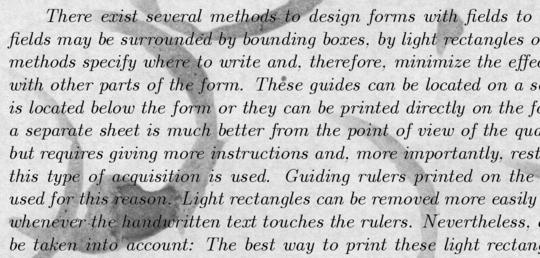

In [ ]:
img = cv2.imread('/content/445566.png')
cv2_imshow(img)

In [ ]:
def load_image(path):
    return np.asarray(Image.open(path))/255.0

def save(path, img):
    tmp = np.asarray(img*255.0, dtype=np.uint8)
    Image.fromarray(tmp).save(path)

def denoise_image(inp):
    # estimate 'background' color by a median filter
    bg = signal.medfilt2d(inp, 11)
    save('background.png', bg)

    # compute 'foreground' mask as anything that is significantly darker than
    # the background
    mask = inp < bg - 0.1
    save('foreground_mask.png', mask)

    # return the input value for all pixels in the mask or pure white otherwise
    return np.where(mask, inp, 1.0)

In [ ]:
inp_path = '/content/445566.png'
out_path = 'output.png'

inp = load_image(inp_path)
out = denoise_image(inp)

save(out_path, out)

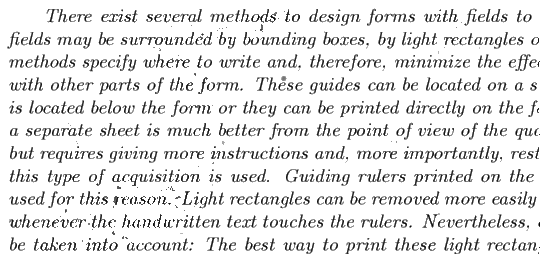

In [ ]:
Image.open(out_path)

In [ ]:
!pip install easyocr

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 70.8 MB 17 kB/s 
     |████████████████████████████████| 47.6 MB 1.1 MB/s 


In [ ]:
import easyocr

In [ ]:
reader = easyocr.Reader(['en'])

Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% Complete

In [ ]:
result = reader.readtext(out_path,paragraph="False")

In [ ]:
result

[[[[4, 4], [540, 4], [540, 258], [4, 258]],
  "There erist several methods to design forms with fields to fields may be surrounded by bounding bores, by light rectangles methods specify where to write and, therefore, minimize the effes with other parts of the form. These guides can be located on a is located below the form or they can be printed directly on the separate sheet is much better from the point of view of the quc but requires giving more instructions and, more importantly; rest this type of acquisition 15 used. Guiding rulers printed on the used for this 0(S0n Light rectangles can be removed more easily whenever thc: handtritten tert touches the rulers Nevertheless be taken 'into aecount: The best way to print these light rectan;"]]